### just random shit for the most part

In [2]:
import pandas as pd
import abagen
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
files = abagen.fetch_microarray(donors='all', verbose=0)

In [4]:
files['9861']['annotation']

'/Users/amyhardy/abagen-data/microarray/normalized_microarray_donor9861/SampleAnnot.csv'

In [5]:
anno = pd.read_csv(files['9861']['annotation'])

In [6]:
anno

,structure_id,slab_num,well_id,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z
0,4077,22,594,CX,PCLa-i,"paracentral lobule, anterior part, right, infe...",37470,87,52,116,5.9,-27.7,49.7
1,4323,11,2985,CX,Cl,"claustrum, right",40517,66,92,63,29.2,17.0,-2.9
2,4323,18,2801,CX,Cl,"claustrum, right",41516,66,81,104,28.2,-22.8,16.8
3,4440,18,2273,CX,LGd,"dorsal lateral geniculate nucleus, left",41473,116,94,101,-24.6,-24.6,1.3
4,4266,17,2785,CX,CA4,"CA4 field, right",41142,63,104,106,31.1,-31.3,-7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,4751,67,1090,CB,PV-III,"III, right, paravermis",51241,84,119,113,8.7,-43.4,-22.4
942,4752,67,1082,CB,PV-IV,"IV, right, paravermis",51239,84,108,122,8.5,-49.7,-8.9
943,4758,67,1074,CB,PV-VIIB,"VIIB, right, paravermis",56063,84,140,135,7.9,-72.3,-40.6
944,4760,67,1058,CB,PV-VIIIB,"VIIIB, right, paravermis",56061,84,154,117,8.3,-57.4,-59.0


In [9]:
atlas = abagen.fetch_desikan_killiany()

In [10]:
csv = pd.read_csv('atlas-desikankilliany.csv')
csv

,id,label,hemisphere,structure
0,1,bankssts,L,cortex
1,2,caudalanteriorcingulate,L,cortex
2,3,caudalmiddlefrontal,L,cortex
3,4,cuneus,L,cortex
4,5,entorhinal,L,cortex
...,...,...,...,...
78,79,pallidum,R,subcortex/brainstem
79,80,accumbensarea,R,subcortex/brainstem
80,81,hippocampus,R,subcortex/brainstem
81,82,amygdala,R,subcortex/brainstem


In [12]:
from neuromaps.parcellate import Parcellater
parc = Parcellater(atlas['image'], 'mni152')

In [13]:
AD_association = nib.load('neurosynth_maps/terms/alzheimer_association-test_z_FDR_0.01.nii')
AD_parc = parc.fit_transform(AD_association, 'mni152')

In [14]:
# parcellated AD association data
AD_parc

array([[0.00000000e+00, 0.00000000e+00, 2.91863150e-03, 0.00000000e+00,
        1.64627017e+00, 4.59790482e-01, 1.38213308e-02, 5.79417904e-01,
        2.62167892e-01, 0.00000000e+00, 1.04059678e-01, 3.31995570e-02,
        3.60654746e-02, 5.72723241e-02, 5.69602056e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.27331312e-02,
        0.00000000e+00, 2.60600581e-02, 0.00000000e+00, 8.34672965e-03,
        3.33454119e-03, 0.00000000e+00, 8.93536710e-02, 2.15374929e-02,
        0.00000000e+00, 3.20790872e-03, 9.03024779e-03, 0.00000000e+00,
        3.86514218e-03, 0.00000000e+00, 0.00000000e+00, 1.42934426e+00,
        1.01591404e-02, 0.00000000e+00, 0.00000000e+00, 2.88764021e-02,
        7.52982528e-03, 1.45518436e-01, 3.20178280e-01, 0.00000000e+00,
        2.22360409e-01, 1.00467291e-01, 0.00000000e+00, 1.37511678e-02,
        1.85928170e-02, 1.53864102e-01, 7.87606711e-03, 1.589488

In [15]:
# ABHA data with atlas parcellation (same as AD_parc)
expression = abagen.get_expression_data(atlas['image'])

In [16]:
expression.shape

(83, 15633)

In [17]:
expression.head()

gene_symbol,A1BG,A1BG-AS1,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
label,,,,,,,,,,,,,,,,,,,,,
1,0.480759,0.688550,0.370086,0.392645,0.360818,0.419254,0.517483,0.759551,0.369701,0.686505,...,0.545096,0.545136,0.563060,0.442549,0.509614,0.371313,0.678011,0.688956,0.544369,0.496820
2,0.623995,0.532027,0.519627,0.623731,0.404923,0.412919,0.456501,0.635867,0.455615,0.683714,...,0.490226,0.408071,0.401761,0.424034,0.348653,0.556901,0.632079,0.468893,0.369227,0.483143
3,0.525373,0.622902,0.519448,0.393459,0.442179,0.550368,0.515183,0.790477,0.352449,0.582405,...,0.499996,0.619777,0.479420,0.350032,0.376171,0.357934,0.679664,0.735109,0.359137,0.455061
4,0.353714,0.576465,0.474117,0.413741,0.354063,0.441846,0.655117,0.754925,0.443763,0.577075,...,0.574148,0.575461,0.443060,0.393485,0.425785,0.378634,0.651728,0.845611,0.562431,0.377707
5,0.667755,0.543455,0.606849,0.526906,0.423939,0.467107,0.349361,0.716827,0.476033,0.614465,...,0.462089,0.539385,0.710304,0.358010,0.398148,0.510071,0.713046,0.339948,0.399627,0.574180


In [21]:
expression.shape, AD_parc.T.shape

((83, 15633), (83, 1))

In [22]:
expression['AD'] = AD_parc.T

In [23]:
expression.drop(expression.index[expression['AD'] == 0], inplace = True)
expression.dropna(inplace=True)

In [24]:
expression['AD'] = np.log(expression['AD'])

In [25]:
expression.shape

(43, 15634)

In [26]:
expression.nlargest(5, ['AD'])

gene_symbol,A1BG,A1BG-AS1,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,AD
label,,,,,,,,,,,,,,,,,,,,,
5,0.667755,0.543455,0.606849,0.526906,0.423939,0.467107,0.349361,0.716827,0.476033,0.614465,...,0.539385,0.710304,0.358010,0.398148,0.510071,0.713046,0.339948,0.399627,0.574180,0.498512
40,0.490292,0.344296,0.427536,0.586020,0.577370,0.583279,0.291768,0.523781,0.640499,0.234787,...,0.538566,0.719953,0.685794,0.449745,0.564028,0.345236,0.273563,0.583096,0.493267,0.357216
81,0.363747,0.271664,0.469768,0.630534,0.656241,0.585701,0.347811,0.507718,0.719961,0.234131,...,0.355556,0.631193,0.642921,0.482462,0.571270,0.371391,0.286521,0.480644,0.432468,-0.107642
8,0.578291,0.696163,0.420250,0.474752,0.380554,0.363455,0.476270,0.797896,0.383587,0.657303,...,0.570905,0.572326,0.416326,0.471603,0.388065,0.694198,0.616343,0.434626,0.497935,-0.545731
15,0.631017,0.618824,0.373092,0.394127,0.446812,0.397319,0.387885,0.707964,0.473886,0.456811,...,0.641104,0.541905,0.450932,0.439447,0.514867,0.657221,0.446785,0.444901,0.432817,-0.562817


In [27]:
expression.loc[5][:-1].nlargest(5)

gene_symbol
EXOC3L2      0.939050
LINC02217    0.925807
GDA          0.915135
LHX2         0.914040
KIF21B       0.910780
Name: 5, dtype: float64

In [28]:
expression.loc[40][:-1].nlargest(5)

gene_symbol
SLC24A3    0.906877
EPHA6      0.899456
SUSD4      0.895791
LRRTM1     0.889791
LRRN2      0.888457
Name: 40, dtype: float64

In [29]:
expression.loc[81][:-1].nlargest(5)

gene_symbol
PNO1       0.912458
SLC24A3    0.909667
ALPK1      0.891972
SUSD4      0.886826
WIPF3      0.875446
Name: 81, dtype: float64

In [30]:
expression.loc[8][:-1].nlargest(5)

gene_symbol
STX1A      0.931906
TMEM155    0.916310
OLFM1      0.908981
RFTN1      0.908588
ENC1       0.902118
Name: 8, dtype: float64

In [31]:
expression.loc[15][:-1].nlargest(5)

gene_symbol
STX1A      0.867296
FABP7      0.845749
NPTX1      0.835478
NEUROD2    0.827978
CA11       0.825816
Name: 15, dtype: float64

In [32]:
AD_corr = expression[expression.columns].corr()['AD']

In [231]:
#AD_corr['AB6E10']

In [35]:
AD_corr.shape

(15634,)

In [37]:
AD_corr[:5]

gene_symbol
A1BG        0.121271
A1BG-AS1    0.135866
A2M        -0.265796
A2ML1       0.050230
A3GALT2     0.076189
Name: AD, dtype: float64

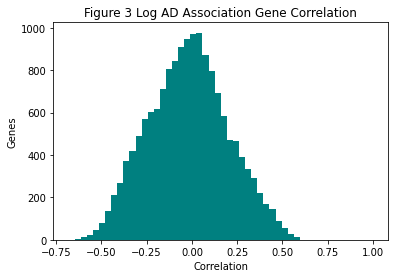

In [33]:
plt.title('Figure 3 Log AD Association Gene Correlation') 
plt.ylabel('Genes')
plt.xlabel('Correlation') 
log_hist_bins = plt.hist(AD_corr,bins=50,color='teal')

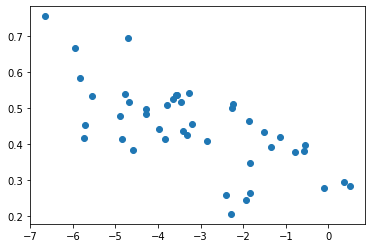

In [241]:
plt.scatter(expression['AD'],expression['NSG1'])

In [178]:
abs(AD_corr[:-1]).nlargest(10)

gene_symbol
NSG1       0.681479
FOXQ1      0.637006
PLCB4      0.629693
FKBP9      0.626061
HIST4H4    0.624609
MAP2K3     0.619874
SV2C       0.614129
SDSL       0.613662
PLCD4      0.612178
CDH6       0.610929
Name: AD, dtype: float64

In [77]:
new = pd.DataFrame({
    'NSG1': expression['NSG1'],
    'FOXQ1': expression['FOXQ1'],
    'PLCB4': expression['PLCB4'],
    'FKBP9': expression['FKBP9'],
    'HIST4H4': expression['HIST4H4'],
    'MAP2K3': expression['MAP2K3'],
    'SV2C': expression['SV2C'],
    'SDSL': expression['SDSL'],
    'PLCD4': expression['PLCD4'],
    'CDH6': expression['CDH6']
})

In [79]:
new.head()

,NSG1,FOXQ1,PLCB4,FKBP9,HIST4H4,MAP2K3,SV2C,SDSL,PLCD4,CDH6
label,,,,,,,,,,
3,0.583627,0.537473,0.543701,0.570812,0.468355,0.541548,0.453781,0.615405,0.489012,0.566208
5,0.284294,0.253065,0.265957,0.361951,0.354445,0.211881,0.174768,0.279616,0.245863,0.299553
6,0.378846,0.338134,0.384011,0.416077,0.371210,0.336301,0.284555,0.394435,0.359745,0.415498
7,0.484528,0.467534,0.466467,0.467866,0.479077,0.434273,0.481794,0.516851,0.503313,0.472382
8,0.398064,0.365364,0.398590,0.435047,0.385632,0.358136,0.306461,0.412714,0.376651,0.418383


In [71]:
import seaborn as sns

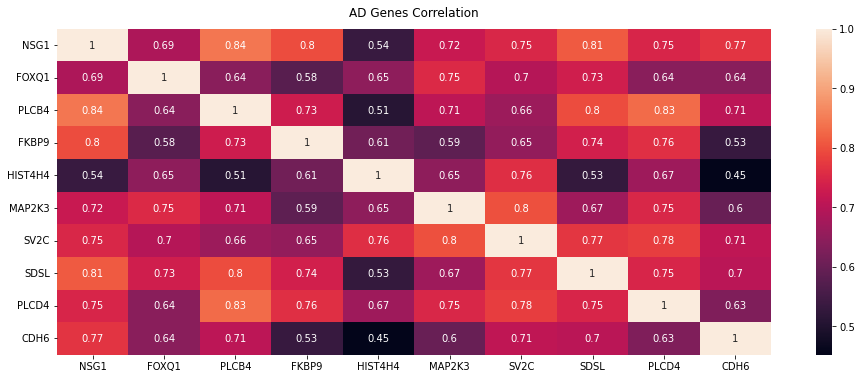

In [104]:
# AD genes co-expression

plt.figure(figsize=(16, 6))
new_heat = sns.heatmap(new.corr(), annot=True);
new_heat.set_title('AD Genes Correlation', fontdict={'fontsize':12}, pad=12);

In [155]:
x = abs(AD_corr[:-1]).nlargest(10).index

<BarContainer object of 10 artists>

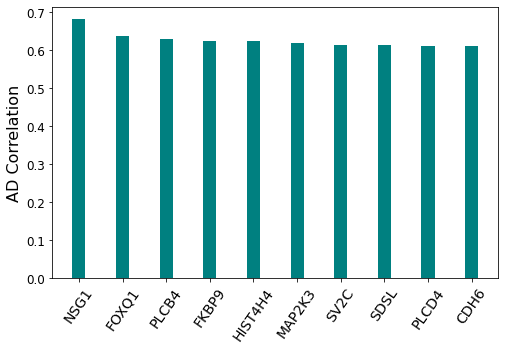

In [224]:
# 10 genes most correlated w/ AD association level

plt.figure(figsize=(8, 5))
#plt.title('AD Genes Correlation',fontsize=20)
plt.ylabel('AD Correlation',fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14,rotation=55)
plt.bar(x=x,height=abs(AD_corr[:-1]).nlargest(10), width=0.3, color='teal')
